# **Problem Statement:**
To prove Moore's Law

What is Moore's Law?

It says that the number of transistors per square inch on an integrated circuit board foubles approx every 2 years.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
url = "https://raw.githubusercontent.com/ingledarshan/DL_dataset/master/moore.csv"
data = pd.read_csv(url, header=None).values

In [8]:
data[:10]
# dataset consists of just 2 cols: 1. no of years and 2. no of transistors on PCB  board

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100],
       [1974, 4500],
       [1974, 8000],
       [1975, 3510],
       [1976, 5000],
       [1976, 8500]])

In [10]:
X = data[:,0].reshape(-1,1)
# we want X in 2D. therefore we use reshape()

In [11]:
X.shape 

(162, 1)

In [12]:
Y = data[:,1]
# we keep Y as it is i.e. 1D

In [13]:
Y.shape

(162,)

In [14]:
type(data)

numpy.ndarray

If you remember, I mentioned the data is Exponential in nature. the problem statement also says so i.e. It says that the number of transistors per square inch on an integrated circuit board foubles approx every 2 years.

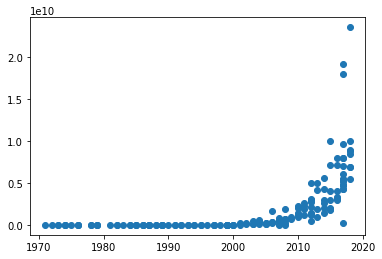

In [16]:
# Lets confirm the above fact.
# Plot using the scatter plot

plt.scatter(X, Y);

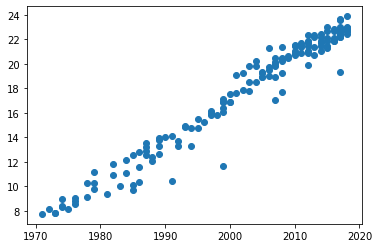

In [17]:
# Lets take the log to make the data Linear.
# We do this as we want to model using Linear Regression Algorithm

Y = np.log(Y)
plt.scatter(X, Y);

Yes, this is a good candidate for Linear regression analysis.

Let me do a bit of data preprocessing. In X, the years start at 1970 and end at 2018 and these are large values. Also they are not centered around 0.

In [18]:
X = X - X.mean()

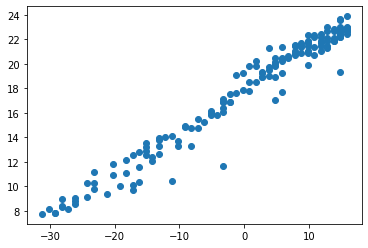

In [19]:
plt.scatter(X, Y);

In Linear regression, the target can be any real number.

Hence, no Activation Function is required.

In [20]:
# Lets create our TensorFlow model now

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])

In model.compile(), I have realized after doing hyperparameter tuning that the default optimizer 'adam' doesnt perform that well.

Therefore, I will be using my most basic optimizer 'Stochastic Gradient Descent'.

SGD( learning rate, momentum)

https://keras.io/api/optimizers/sgd/

In [21]:
# Lets call model.compile()

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

Another interesting thing which I have observed wrt this dataset is that the Initial learning rate performs well at the begining, however, it becomes too large by the end.

And because of this, the cost function jumped up and down and never converged.

So to tackle this, we are now going to reduce the learning rate gradually depending upon the the number of epochs. This concept is called as "Learning Rate Scheduling".

In [22]:
# Learning Rate Scheduler

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train my model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 636.7553
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 455.6847
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 271.3692
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 196.7467
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 152.2247
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 168.1296
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 122.1555
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 88.5161
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 48.3310
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 39.5188
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 27.6651
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 19.7903
Epoch 13/200
6/6 [========================

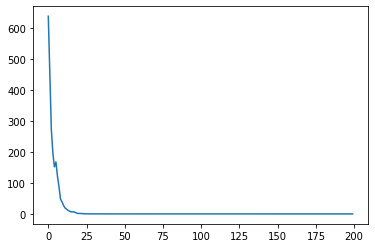

In [23]:
# Plot the loss

plt.plot(r.history['loss'], label='loss');

It has good convergence.

In [24]:
# Now, lets get the trained weights of the model.

# Get the slope of the line.
print(model.layers) # There is only one layer

In [26]:
print(model.layers[0].get_weights())

[array([[0.33812654]], dtype=float32), array([17.765564], dtype=float32)]


In [29]:
print(model.layers[0].get_weights()[0][0][0] )

0.33812654


In [31]:
a = model.layers[0].get_weights()[0][0,0]
a

0.33812654

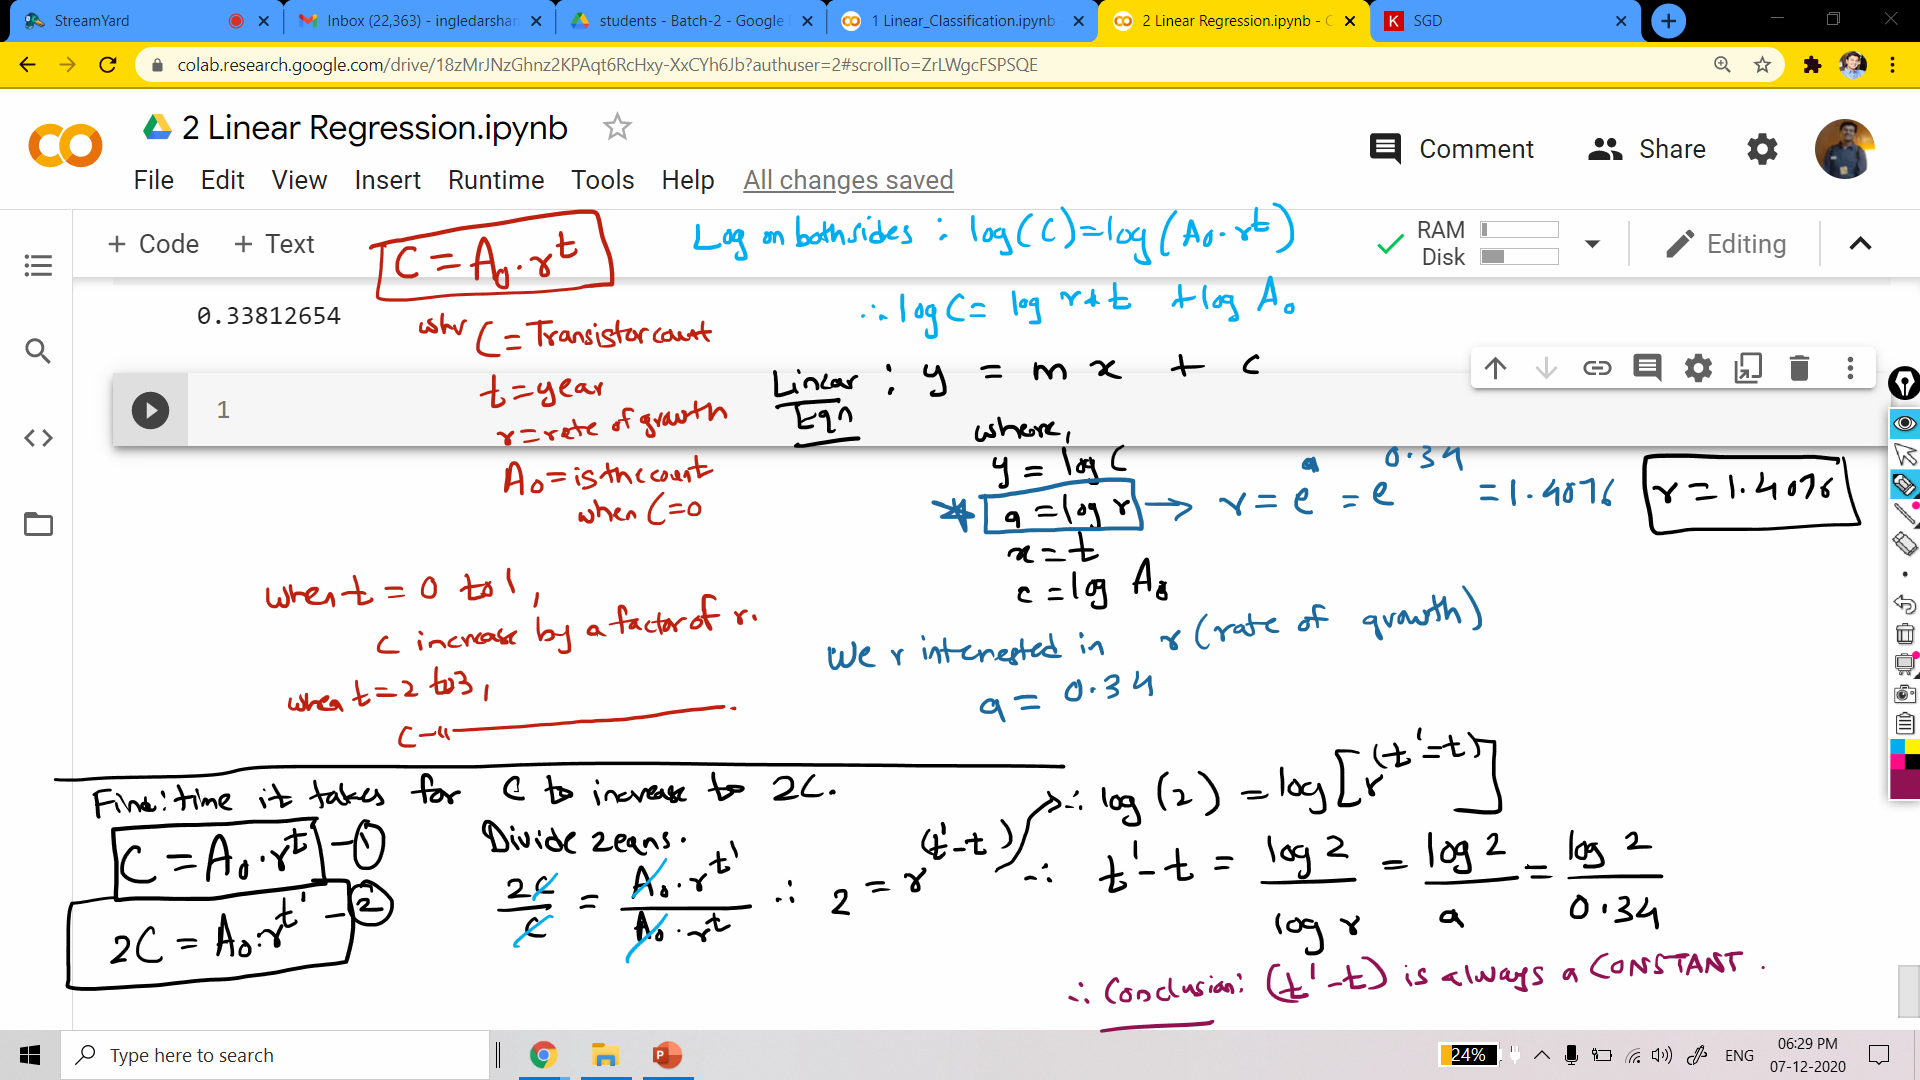

In [32]:
print("Time to double:", np.log(2)/a)

Time to double: 2.0499638395220585


Therefore, we have confirmed that the Moore's law is true as we can see it has doubled.

In [35]:
Y.shape

(162,)

# **Make predictions**

In [34]:
model.predict(X).shape

(162, 1)

We want our predictions as usual in the form of a 1D array. therefore, we will flatten the output so Yhat has the same shape as Y. 

In [37]:
Yhat = model.predict(X).flatten()
Yhat.shape

(162,)

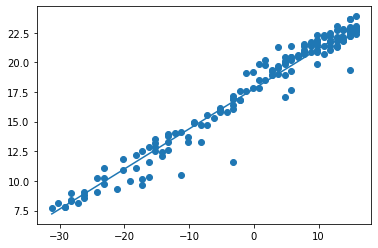

In [38]:
plt.scatter(X , Y)
plt.plot(X, Yhat);

As expected, we see that the LOBF passes through the data points. therefore, we have once again confirmed the Moore's Law.

In [39]:
X.shape

(162, 1)

Lets now see it manually and check if our predictions equal to the predictions we got using model.predict()

In [40]:
# Manual calculations

# Weights
w, b = model.layers[0].get_weights()

X = X.reshape(-1,1)

Yhat2 = (X.dot(w) + b).flatten()

np.allclose(Yhat , Yhat2)

True

# **Happy Learning**